# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import tensorflow 

# Import Data

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class:  Ankle boot


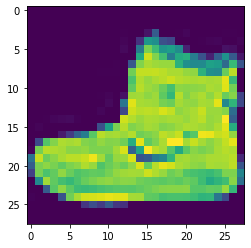

class:  T-shirt/top


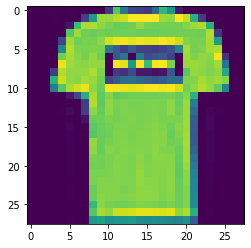

class:  T-shirt/top


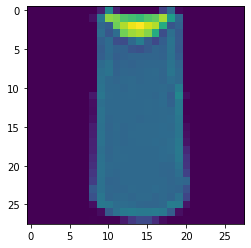

class:  Dress


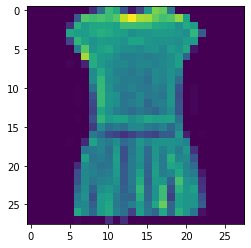

class:  T-shirt/top


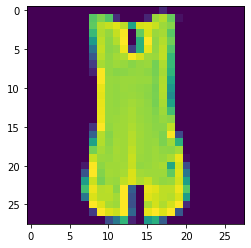

class:  Pullover


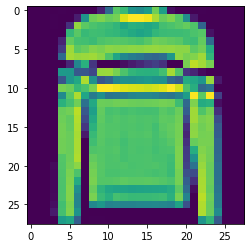

class:  Sneaker


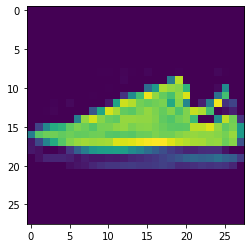

class:  Pullover


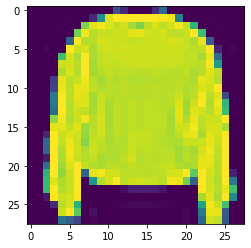

class:  Sandal


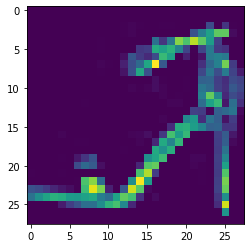

class:  Sandal


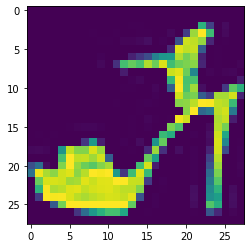

In [6]:
for i in range(10):
    print('class: ',class_names[int(y_train[i])])
    plt.imshow(X_train[i])
    plt.show()

# Preprocessing

In [7]:
X_train.min(),X_train.max()

(0, 255)

In [8]:
X_train = X_train/255

In [9]:
X_test = X_test/255

In [10]:
X_train.min(),X_train.max()

(0.0, 1.0)

# Autoencoder

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GaussianNoise, Reshape
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
noise = GaussianNoise(0.2)

Original Image


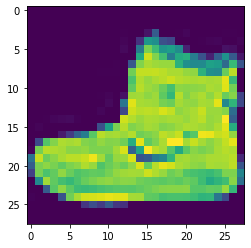

Noisy Image

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



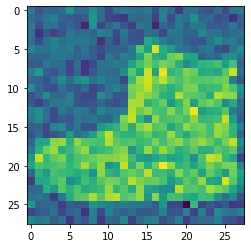

In [13]:
print('Original Image')
plt.imshow(X_train[0])
plt.show()

print('Noisy Image')
plt.imshow(noise(X_train[0], training = True))
plt.show()

In [14]:
X_train[0].shape

(28, 28)

In [15]:
28*28

784

In [16]:
tensorflow.random.set_seed(1)
np.random.seed(1)


encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(units = 400, 
                  activation = 'relu'))
encoder.add(Dense(units = 200, 
                  activation = 'relu'))
encoder.add(Dense(units = 100, 
                  activation = 'relu'))
encoder.add(Dense(units = 50, 
                  activation = 'relu'))
encoder.add(Dense(units = 25, 
                  activation = 'relu'))


In [17]:
decoder = Sequential()
decoder.add(Dense(input_shape = [25],
                  units = 50, 
                  activation = 'relu'))
decoder.add(Dense(units = 100, 
                  activation = 'relu'))
decoder.add(Dense(units = 200, 
                  activation = 'relu'))
decoder.add(Dense(units = 400, 
                  activation = 'relu'))
decoder.add(Dense(units = 784, 
                  activation = 'sigmoid'))
decoder.add(Reshape([28,28]))

In [18]:
Autoencoder = Sequential([encoder, decoder])

In [19]:
Autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer= 'adam')

# Training 

In [20]:
Autoencoder.fit(X_train, 
                X_train, 
                epochs = 60)

Epoch 1/60
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3220
Epoch 2/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2970
Epoch 3/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2917
Epoch 4/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2887
Epoch 5/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2866
Epoch 6/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2852
Epoch 7/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2841
Epoch 8/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2833
Epoch 9/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2825
Epoch 10/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2818
Epoch 11/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2811
Epoch 12/60
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2807


# Evaluation

In [21]:
noisy_images = noise(X_test, training = True)

In [22]:
denoised_images = Autoencoder(noisy_images)

Ankle boot


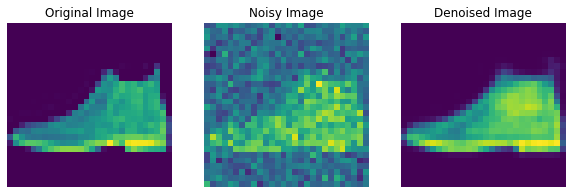

Pullover


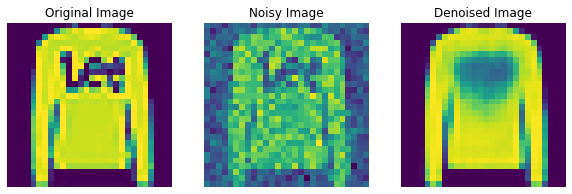

Trouser


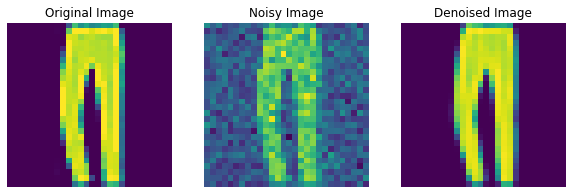

Trouser


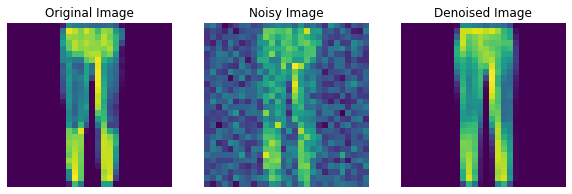

Shirt


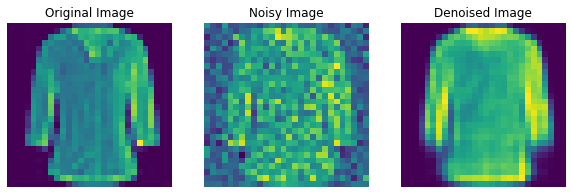

Trouser


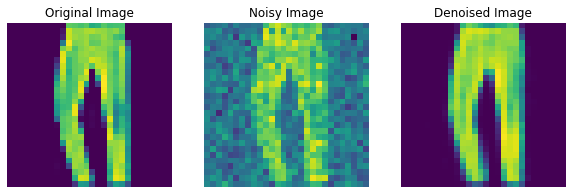

Coat


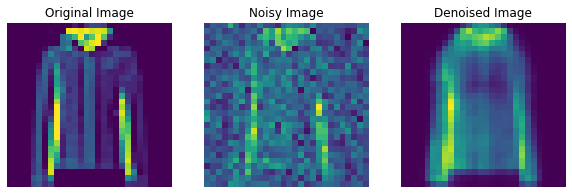

Shirt


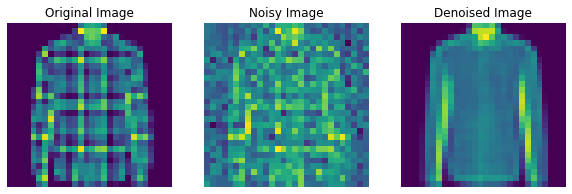

Sandal


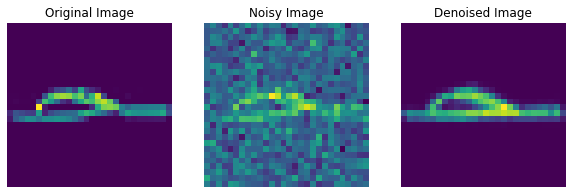

Sneaker


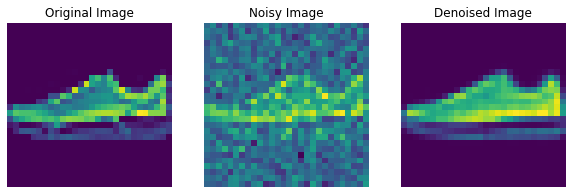

In [24]:
for i in range(10):
            fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (10,10))
            print(class_names[y_test[i]])
            ax1.imshow(X_test[i])
            ax1.axis('off')
            ax1.set_title('Original Image')
            ax2.imshow(noisy_images[i])
            ax2.axis('off')
            ax2.set_title('Noisy Image')
            ax3.imshow(denoised_images[i])
            ax3.axis('off')
            ax3.set_title('Denoised Image')
            plt.show()